# Introduction

This notebook demonstrates

- how to derive the equations of motion for the cart-mounted triple plendulum,
- how to interactively check the kinematics and
- how to simulate and animate the final system.

In [1]:
import time
time.ctime()

'Wed Sep 25 02:18:38 2019'

In [2]:
%load_ext ipydex.displaytools

import sys
import os
import pickle
import numpy as np
from scipy.integrate import odeint


import sympy as sp
from sympy import sin, cos, Function
from sympy.interactive import printing
from matplotlib import pyplot as plt

import symbtools as st
from symbtools import modeltools as mt
import symbtools.visualisation as vt

printing.init_printing()
np.set_printoptions(precision=3, suppress=True)


Bild: 

<img src="images/model_triple.png">

In [3]:
# system parameters
params = sp.symbols('m0, m1, m2, m3, J1, J2, J3, l1, l2, l3, a1, a2, a3, g, d1, d2, d3')
st.make_global(params)

params_values = [(m0, 3.34), (m1, 0.8512), (m2, 0.8973), (m3, 0.5519), 
                 (J1, 0.01980194), (J2, 0.02105375), (J3, 0.01818537), 
                 (l1, 0.32), (l2, 0.419), (l3, 0.485), 
                 (a1, 0.20001517), (a2, 0.26890449), (a3, 0.21666087), (g, 9.81),
                 (d1, 0.00715294), (d2, 1.9497e-06), (d3, 0.00164642)]

F = sp.Symbol('F')  # Force  on the cart

Np = 3  # number of passive coordinates
Nq = 1  # number of active coordinates
n = Np + Nq
pp = st.symb_vector("p1:{0}".format(Np+1))  # passive coordinates
qq = st.symb_vector("q1:{0}".format(Nq+1))  # active coordinates

aa = st.symb_vector("a1:{0}".format(Nq+1))  # accelerations

ttheta = st.row_stack(pp, qq) ##:T   # all coordinates together
tthetad = st.time_deriv(ttheta, ttheta) ##:T
tthetadd = st.time_deriv(ttheta, ttheta, order=2) ##:T
st.make_global(ttheta, tthetad)


---


---


---


Bedeutung der Variablen

$[p_1, p_2, p_3, q_1] = [\varphi_1, \varphi_2, \varphi_3, x_0]$

### Definition of the geometric relations of the system


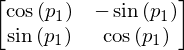

---


In [4]:
# unit vectors
ex = sp.Matrix([1, 0])
ey = sp.Matrix([0, 1])

# rotation matrix
Rz = mt.Rz
Rz(p1)  ##:

---


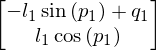

---


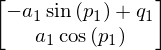

---


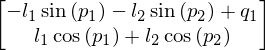

---


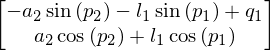

---


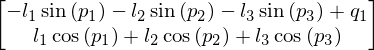

---


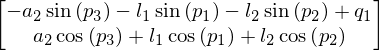

---


In [5]:
# centers of masses (Si) and joints (Gi)

S0 = G0 = ex*q1 ##:

G1 = G0 + Rz(p1)*ey*l1 ##:
S1 = G0 + Rz(p1)*ey*a1 ##:

G2 = G1 + Rz(p2)*ey*l2 ##:
S2 = G1 + Rz(p2)*ey*a2 ##:

G3 = G2 + Rz(p3)*ey*l3 ##:
S3 = G2 + Rz(p3)*ey*a2 ##:


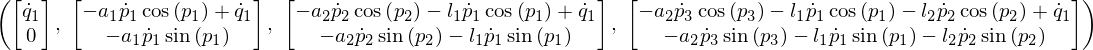

---


In [6]:
# time derivatives of the coordinates of the centers of masses
S0dt, S1dt, S2dt, S3dt = st.col_split(st.time_deriv(st.col_stack(S0, S1, S2, S3), ttheta)) ##:

In [7]:
# kinetic energy of the cart
T0 = 0.5 * m0 * qdot1**2
# kinetic energy of pendulum1
T1 = 0.5 * m1 * (S1dt.T * S1dt)[0] + 0.5 * J1 * pdot1**2
# kinetic energy of pendulum2
T2 = 0.5 * m2 * (S2dt.T * S2dt)[0] + 0.5 * J2 * pdot2**2
# kinetic energy of pendulum3
T3 = 0.5 * m3 * (S3dt.T * S3dt)[0] + 0.5 * J3 * pdot3**2

# total kinetic energy
T = T0 + T1 + T2 + T3

# total potential energy
V = g * (m1 * S1[1] + m2 * S2[1] + m3 * S3[1])

# velocity dependent friction
R = 0.5 * d1 * pdot1**2 + 0.5 * d2 * (pdot2 - pdot1)**2 + 0.5 * d3 * (pdot3 - pdot2)**2

### Interactive visualization of kinematics

In [8]:
vis = vt.Visualiser(ttheta, xlim=(-4, 4), ylim=(-2, 2))
vis.add_linkage(st.col_stack(G0, G1, G2, G3).subs(params_values))
vis.interact(theta2=(-3.14, 3.14, 0.01))

interactive(children=(FloatSlider(value=0.0, description='p1', max=5.0, min=-5.0), FloatSlider(value=0.0, desc…

In [9]:
external_forces = [0, 0, 0, F] ##:

---


In [10]:
if 0:
    %time mod = mt.generate_symbolic_model(T, V, ttheta, external_forces)
    # %time mod.calc_coll_part_lin_state_eq()
else:
    # save some time
    with open("model_triple_pendulum.pcl", "rb") as pfile:
        mod = pickle.load(pfile)

In [11]:
%time mod.calc_state_eq(simplify=False)

mod.f.co ##:T

CPU times: user 840 ms, sys: 8 ms, total: 848 ms
Wall time: 850 ms


---


In [12]:
%time simmod = st.SimulationModel(mod.f, mod.g, mod.xx, model_parameters=params_values)

%time rhs = simmod.create_simfunction(use_sp2c=True)

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 9.19 ms
gcc -c -fPIC -lm /media/workcard/workstickdir/projekte/rst_python/symbtools-TUD-RST-Account/symbtools/vf_f.c -o /media/workcard/workstickdir/projekte/rst_python/symbtools-TUD-RST-Account/symbtools/vf_f.o

gcc -shared /media/workcard/workstickdir/projekte/rst_python/symbtools-TUD-RST-Account/symbtools/vf_f.o -o /media/workcard/workstickdir/projekte/rst_python/symbtools-TUD-RST-Account/symbtools/vf_f.so

loading  /media/workcard/workstickdir/projekte/rst_python/symbtools-TUD-RST-Account/symbtools/vf_f.so
gcc -c -fPIC -lm /media/workcard/workstickdir/projekte/rst_python/symbtools-TUD-RST-Account/symbtools/matrix_G.c -o /media/workcard/workstickdir/projekte/rst_python/symbtools-TUD-RST-Account/symbtools/matrix_G.o

gcc -shared /media/workcard/workstickdir/projekte/rst_python/symbtools-TUD-RST-Account/symbtools/matrix_G.o -o /media/workcard/workstickdir/projekte/rst_python/symbtools-TUD-RST-Account/symbtools/matrix_G.so

loadin

In [13]:
%%time

xx0 = np.array([1, 2, 3, -3,  0, 0, 0, 1])

# Simulate 5s
tt = np.linspace(0, 5, 1000)
res = odeint(rhs, xx0, tt)  ##:S

---
CPU times: user 584 ms, sys: 12 ms, total: 596 ms
Wall time: 817 ms


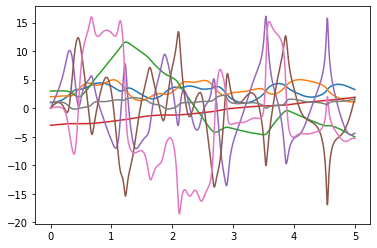

In [14]:
plt.plot(tt, res)

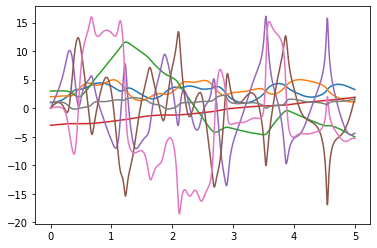

In [15]:
plt.plot(tt, res)

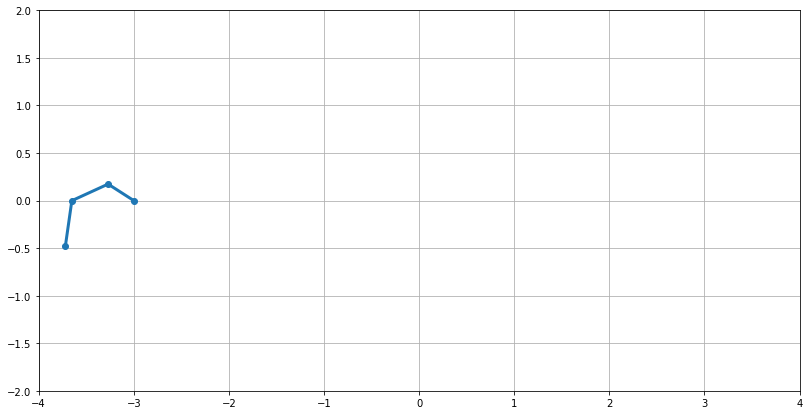

In [16]:
# Create object for Animation

simanim = vt.SimAnimation(mod.xx[:4], tt, res[:, :4], figsize=(14, 7))
simanim.add_visualiser(vis)

# plot first frame
simanim.plot_frame(0)

In [17]:
# this is probably platform dependent:

plt.rcParams["animation.codec"] = "libvpx-vp9"  # codec for webm
plt.rcParams['animation.ffmpeg_path'] = os.path.join(os.getenv("CONDA_PREFIX"), "bin", "ffmpeg")
# plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'



In [18]:
# render animation to video file

fname = 'triple_pendulum_animation_c.mp4'
# simanim.save(fname, dpi=50)  

In [19]:
vt.display_video_file(fname, width=1000)